In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler as ROS
from sklearn.preprocessing import StandardScaler

In [ ]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
data = pd.read_csv('magic04.data', names = cols)
data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [ ]:
data['class'] = (data['class'] == 'g').astype(int)
data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


In [ ]:
data.head()
data.tail()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0
19019,187.1814,53.0014,3.2093,0.2876,0.1539,-167.3125,-168.4558,31.4755,52.7310,272.3174,0


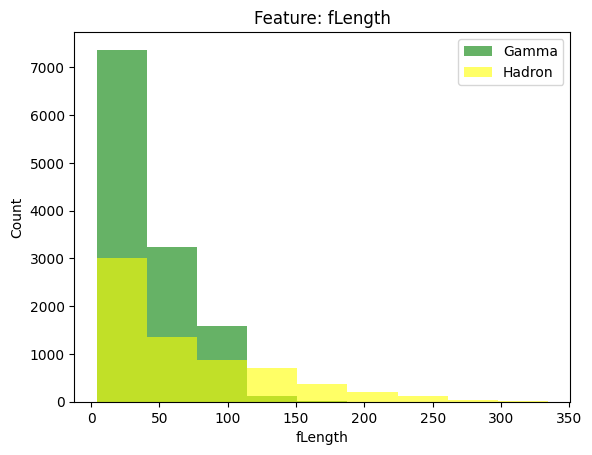

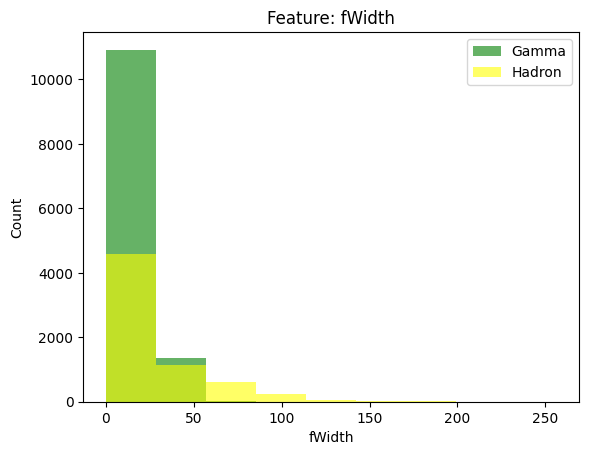

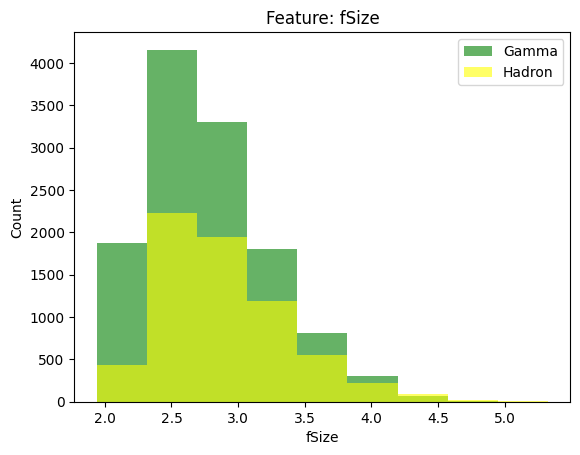

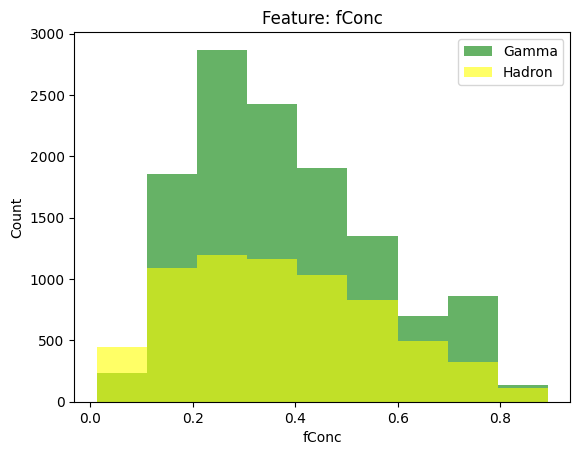

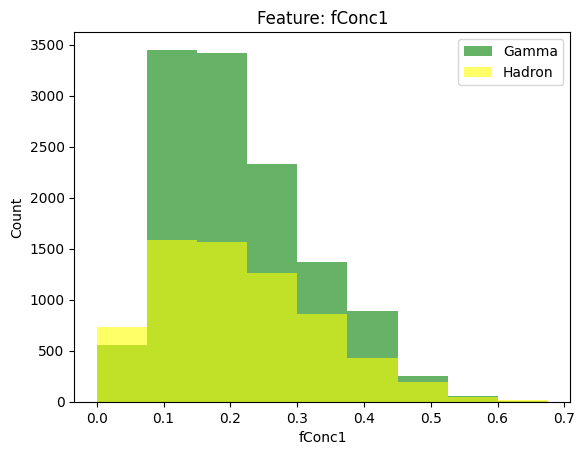

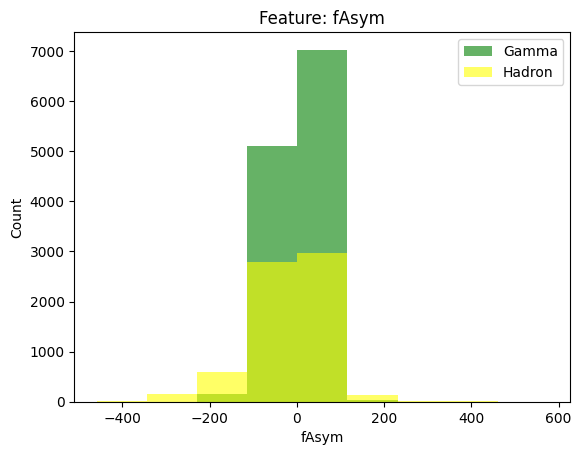

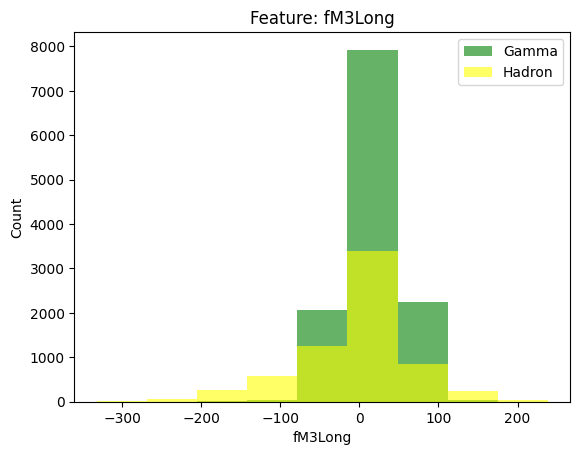

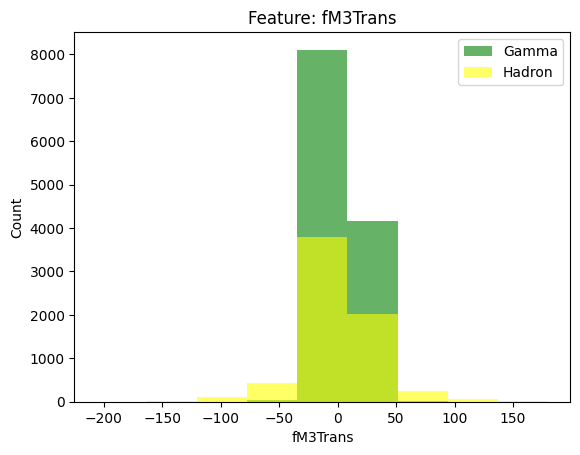

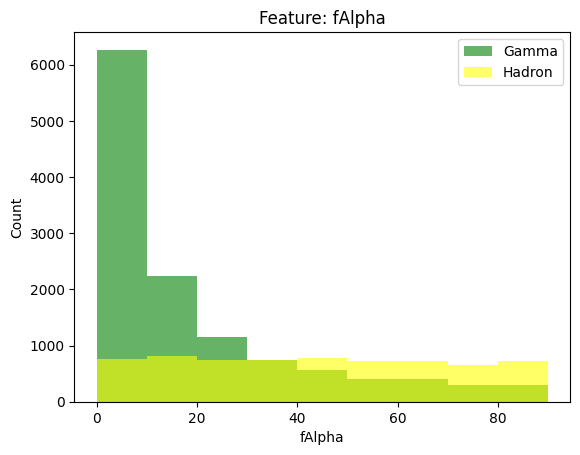

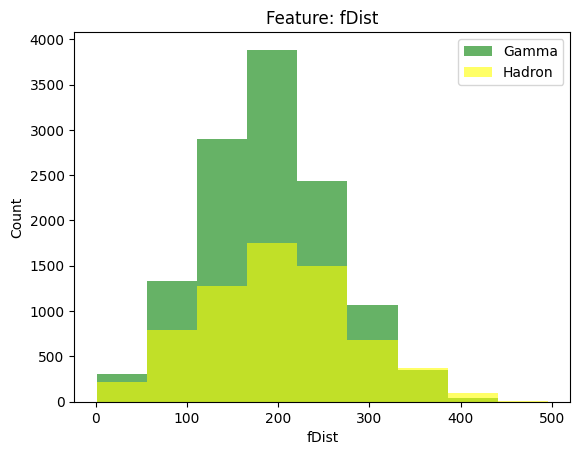

In [ ]:
for label in cols[:-1]:
    bins = np.linspace(data[label].min(), data[label].max(), 10)

    gamma_counts, _ = np.histogram(data[data['class'] == 1][label], bins=bins)
    hadron_counts, _ = np.histogram(data[data['class'] == 0][label], bins=bins)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    plt.bar(bin_centers, gamma_counts, width=(bins[1] - bins[0]), color='green', alpha=0.6, label='Gamma')
    plt.bar(bin_centers, hadron_counts, width=(bins[1] - bins[0]), color='yellow', alpha=0.6, label='Hadron')
    plt.title(f"Feature: {label}")
    plt.xlabel(label)
    plt.ylabel('Count')
    plt.legend()
    plt.show()

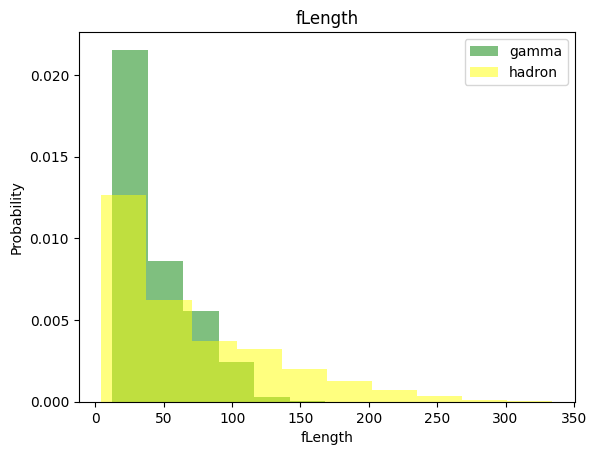

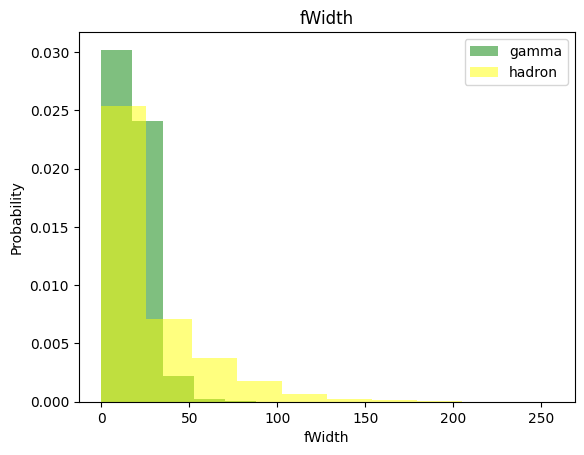

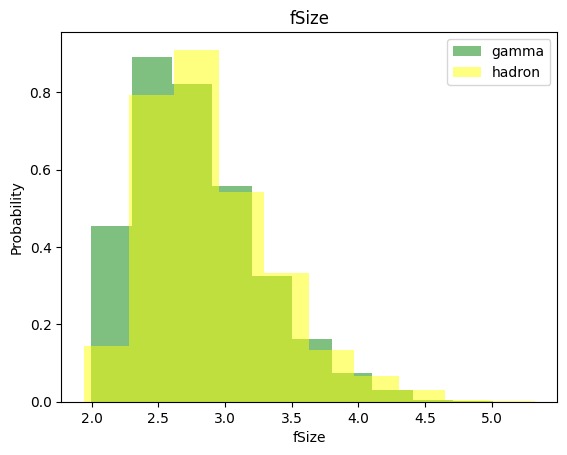

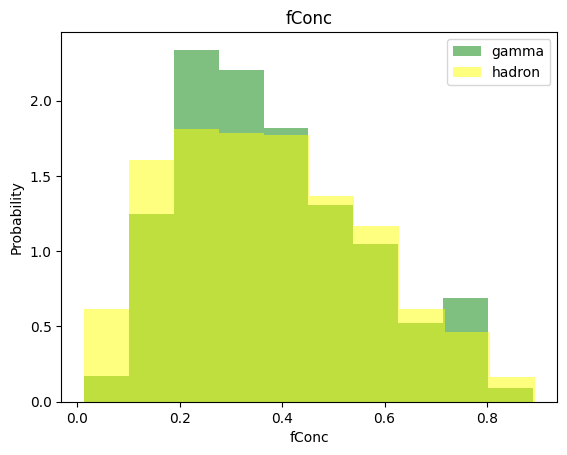

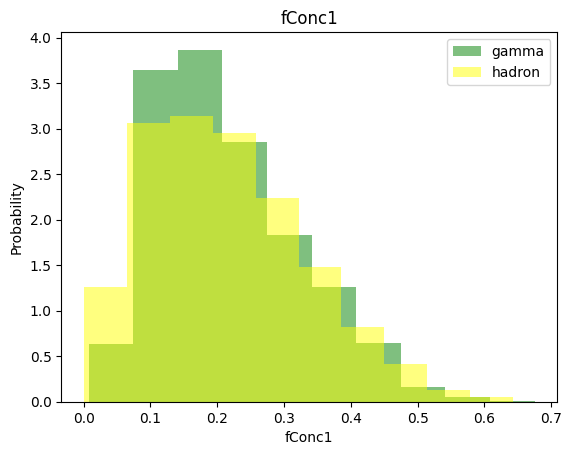

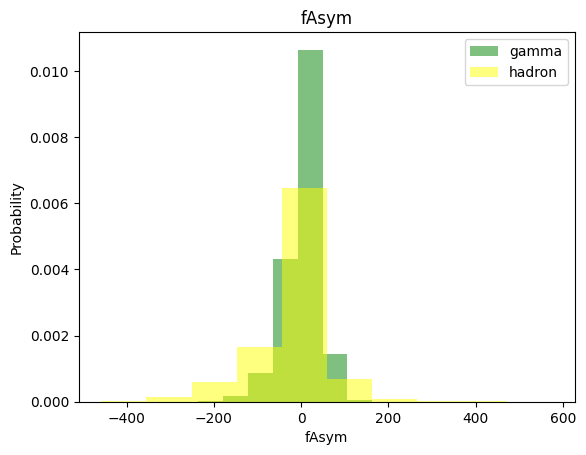

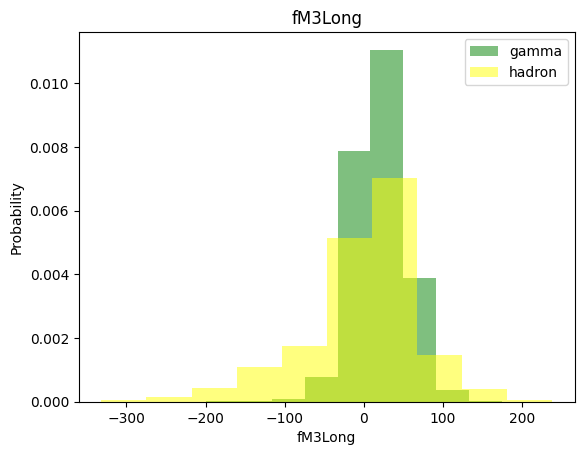

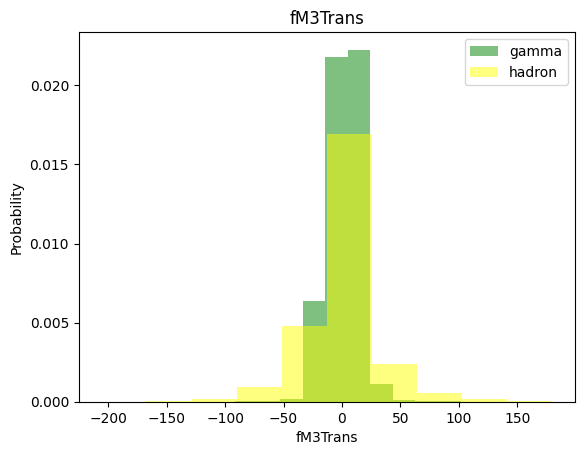

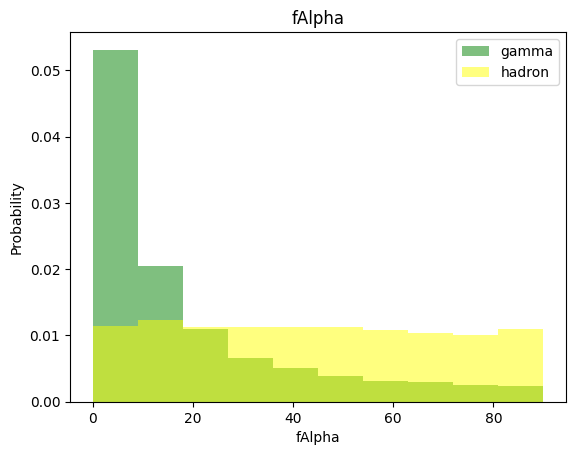

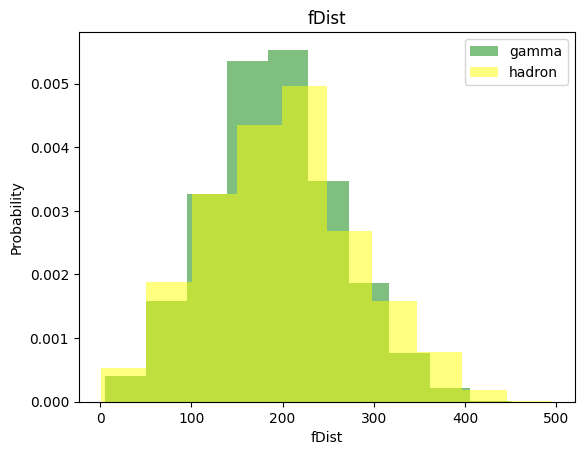

In [ ]:
for label in cols[:-1] :
  plt.hist(data[data['class'] == 1][label], color = 'green', label = 'gamma', alpha = 0.5, density = True)
  plt.hist(data[data['class'] == 0][label], color = 'yellow', label = 'hadron', alpha = 0.5, density = True)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

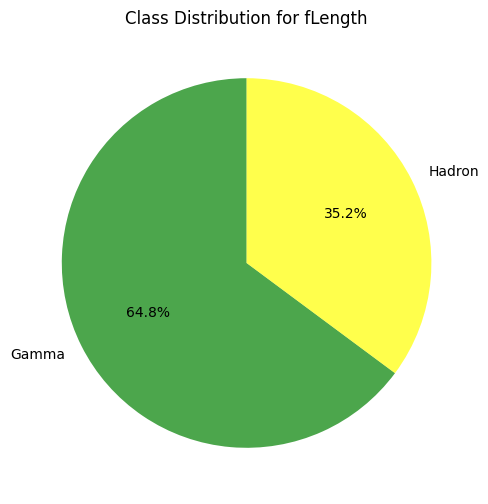

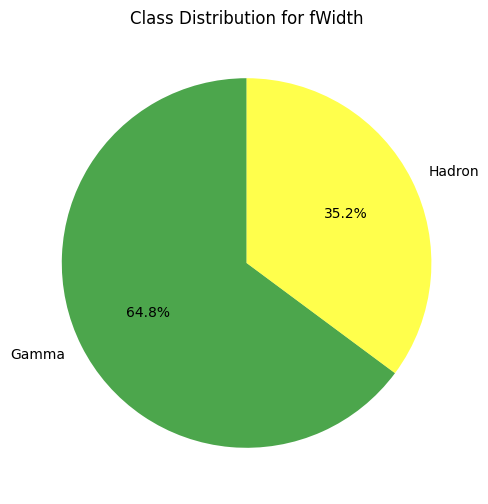

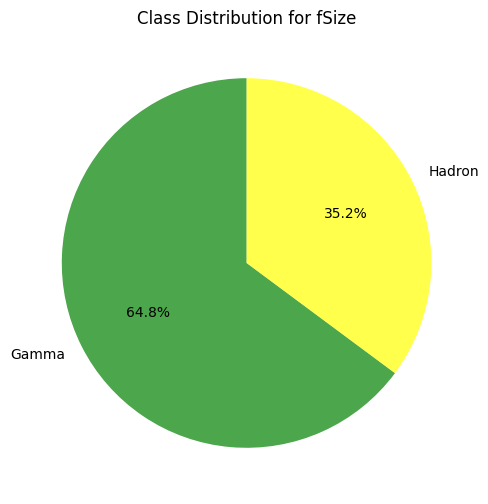

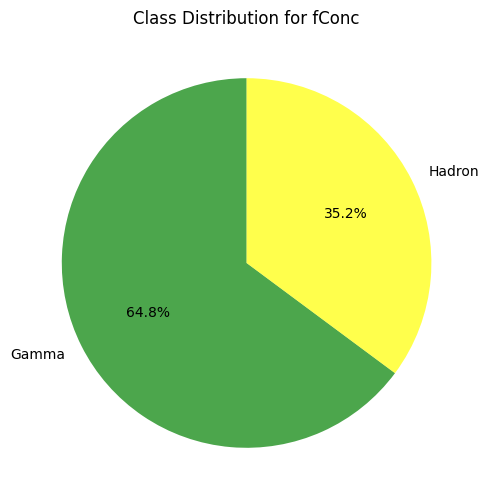

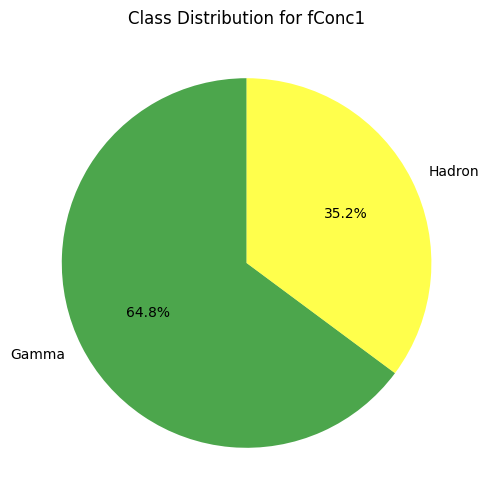

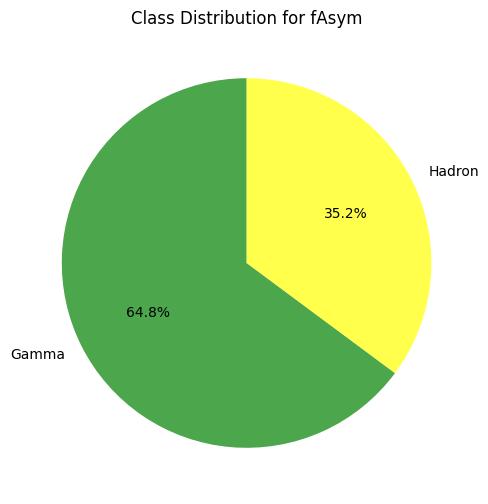

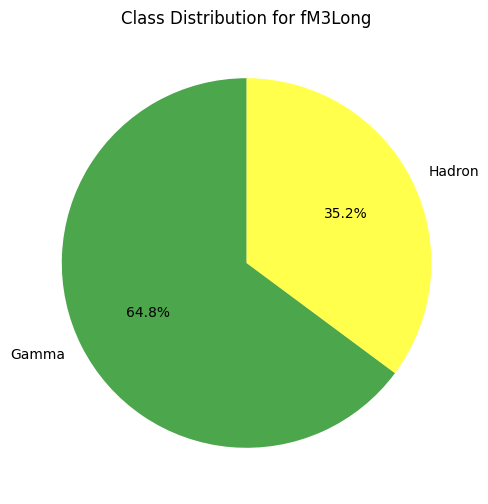

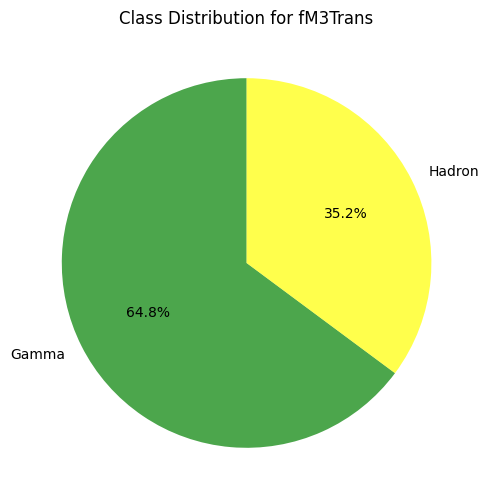

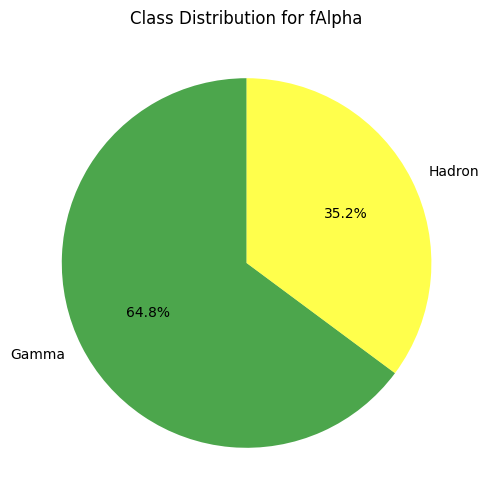

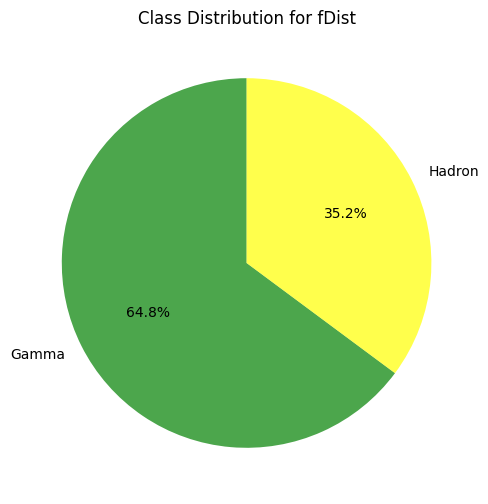

In [ ]:
for label in cols[:-1]:
    bins = np.linspace(data[label].min(), data[label].max(), 5)
    gamma_counts, _ = np.histogram(data[data['class'] == 1][label], bins=bins)
    hadron_counts, _ = np.histogram(data[data['class'] == 0][label], bins=bins)
    total_gamma = np.sum(gamma_counts)
    total_hadron = np.sum(hadron_counts)
    labels = ['Gamma', 'Hadron']
    sizes = [total_gamma, total_hadron]
    colors = ['green', 'yellow']
    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'alpha': 0.7})
    plt.title(f"Class Distribution for {label}")
    plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


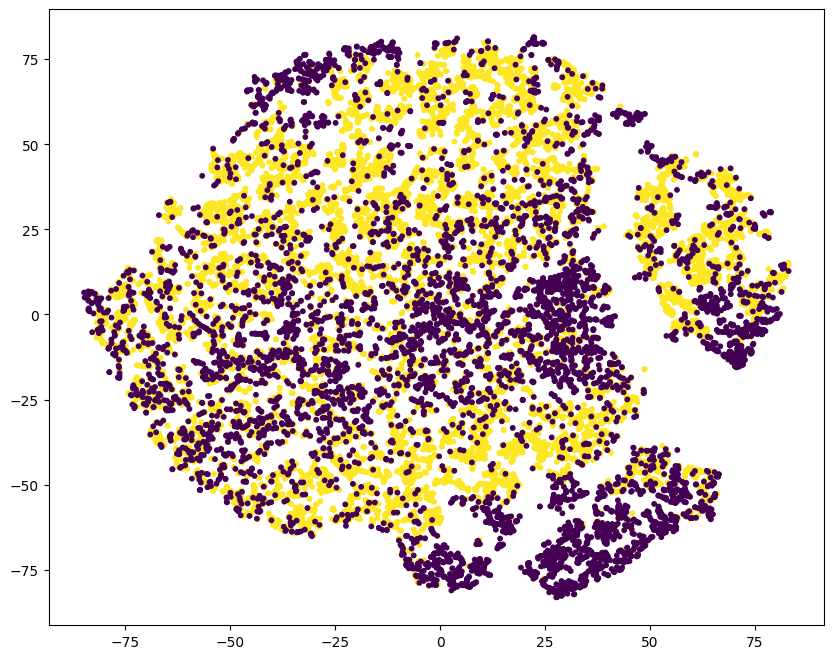

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(
    n_components = 2,
    perplexity=30,
    n_iter=1000,
    learning_rate = 200,
    random_state = None
  )
reduced_data = tsne.fit_transform(data)

labels = data['class']
plt.figure(figsize = (10, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:,1], c = labels, cmap = 'viridis', s = 10)
plt.show()

<Axes: >

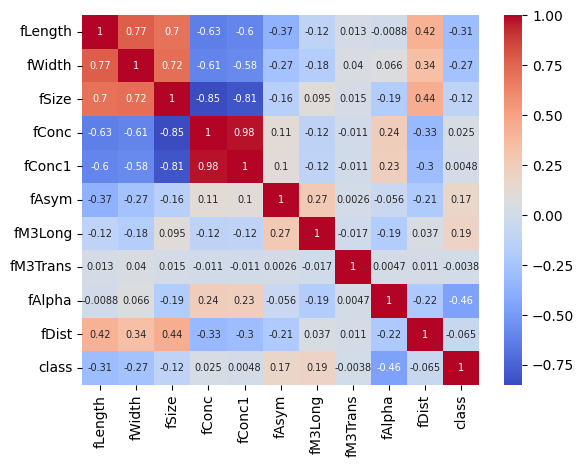

In [ ]:
data_corr = data.corr()
sns.heatmap(data_corr, annot = True, annot_kws = {'size' : 7},cmap = 'coolwarm')

In [ ]:
train, test = train_test_split(data, test_size = 0.15, random_state = 1)
train, valid = train_test_split(train, test_size = 0.1, random_state = 1)

In [ ]:
def scale_data(df, oversample = False) :
  x = df[df.columns[:-1]].values
  y = df[df.columns[-1]].values
  ss = StandardScaler()
  x = ss.fit_transform(x)
  if oversample :
    ros = ROS()
    x, y = ros.fit_resample(x, y)
  data = np.hstack((x, np.reshape(y, (-1, 1))))
  return data, x, y

In [ ]:
train, x_train, y_train = scale_data(train, oversample = True)
valid, x_valid, y_valid = scale_data(valid, oversample = False)
test, x_test, y_test = scale_data(test, oversample = False)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred = knn_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74       974
           1       0.88      0.84      0.86      1879

    accuracy                           0.82      2853
   macro avg       0.80      0.81      0.80      2853
weighted avg       0.82      0.82      0.82      2853



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lgr_model = LogisticRegression()
lgr_model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lgr_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.73      0.70       974
           1       0.85      0.81      0.83      1879

    accuracy                           0.78      2853
   macro avg       0.76      0.77      0.76      2853
weighted avg       0.79      0.78      0.78      2853



In [ ]:
df2 = data
df2.drop(columns = ['fM3Trans', 'fDist', 'fConc1', 'fConc'], inplace = True)
df2.head()

,fLength,fWidth,fSize,fAsym,fM3Long,fAlpha,class
0,28.7967,16.0021,2.6449,27.7004,22.0110,40.0920,1
1,31.6036,11.7235,2.5185,26.2722,23.8238,6.3609,1
2,162.0520,136.0310,4.0612,116.7410,-64.8580,76.9600,1
3,23.8172,9.5728,2.3385,27.2107,-6.4633,10.4490,1
4,75.1362,30.9205,3.1611,-5.5277,28.5525,4.6480,1


In [ ]:
train2, test2 = train_test_split(df2, test_size = 0.15, random_state = 1)
train2, valid2 = train_test_split(train2, test_size = 0.1, random_state = 1)

In [ ]:
train2, x_train2, y_train2 = scale_data(train2, oversample = True)
valid2, x_valid2, y_valid2 = scale_data(valid2, oversample = False)
test2, x_test2, y_test2 = scale_data(test2, oversample = False)

In [ ]:
knn_model.fit(x_train2, y_train2)
y_pred2 = knn_model.predict(x_test2)
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73       974
           1       0.87      0.84      0.86      1879

    accuracy                           0.81      2853
   macro avg       0.79      0.80      0.79      2853
weighted avg       0.82      0.81      0.81      2853



In [ ]:
lgr_model.fit(x_train2, y_train2)
y_pred2 = lgr_model.predict(x_test2)
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69       974
           1       0.85      0.82      0.83      1879

    accuracy                           0.78      2853
   macro avg       0.76      0.77      0.76      2853
weighted avg       0.79      0.78      0.79      2853



In [ ]:
import tensorflow as tf

In [ ]:
df plot_history(history) :
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,4))
  ax1.plot(history.history['loss'], label = 'loss', color = 'blue')
  ax1.plot(history.history['val_loss'], label = 'val_loss', color = 'orange')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Loss')
  ax1.legend()
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label = 'accuracy', color = 'blue')
  ax2.plot(history.history['val_accuracy'], label = 'val_accuracy', color = 'orange')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()
  ax2.grid(True)

  plt.show()

In [ ]:
def train_model(x_train, y_train, num_nodes, dropout_prob, epochs, batch_size, loss, opt, lr = 0.001) :
  nn_model = tf.keras.Sequential(
      [
          tf.keras.layers.Dense(num_nodes, activation = 'relu', input_shape = (6,)),
          tf.keras.layers.Dropout(dropout_prob),
          tf.keras.layers.Dense(num_nodes, activation = 'relu'),
          tf.keras.layers.Dropout(dropout_prob),
          tf.keras.layers.Dense(1, activation = 'sigmoid')
      ]
  )

  nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr), loss = 'binary_crossentropy', metrics = ["accuracy"])
  history = nn_model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_split = 0.2, verbose = 0)
  return nn_model, history

16 nodes, dropout 0, lr = 0.001, batch_size 32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


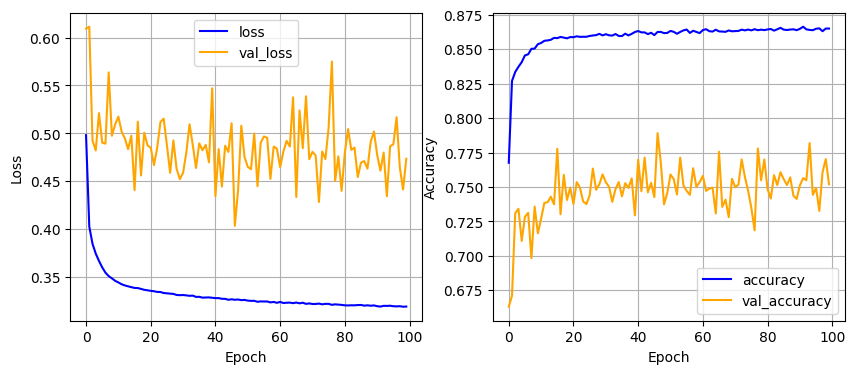

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8598 - loss: 0.3297
16 nodes, dropout 0.2, lr = 0.001, batch_size 32


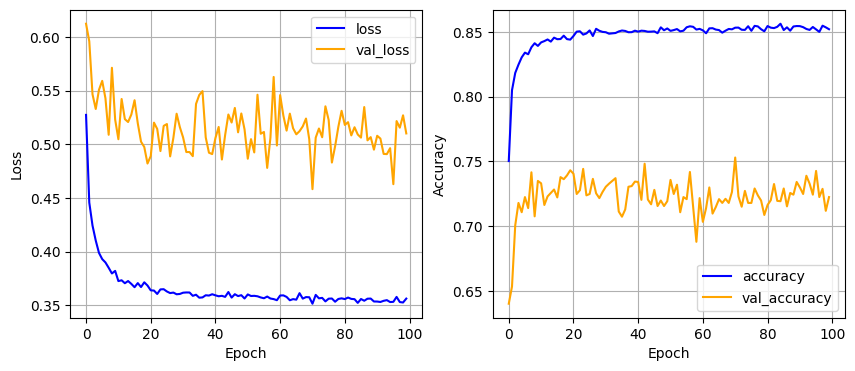

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8560 - loss: 0.3342
32 nodes, dropout 0, lr = 0.001, batch_size 32


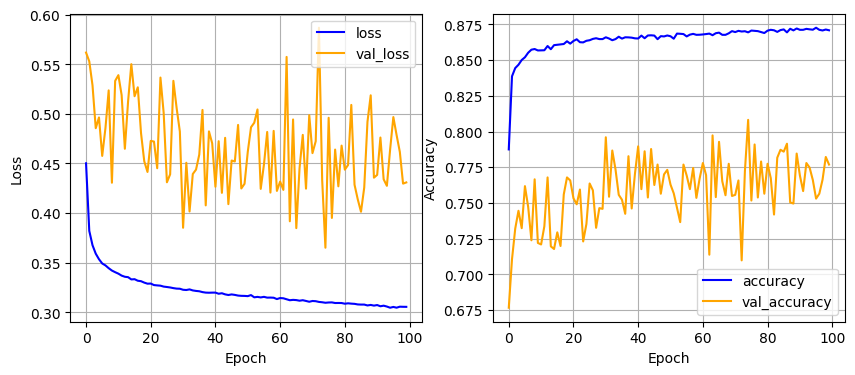

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8539 - loss: 0.3354
32 nodes, dropout 0.2, lr = 0.001, batch_size 32


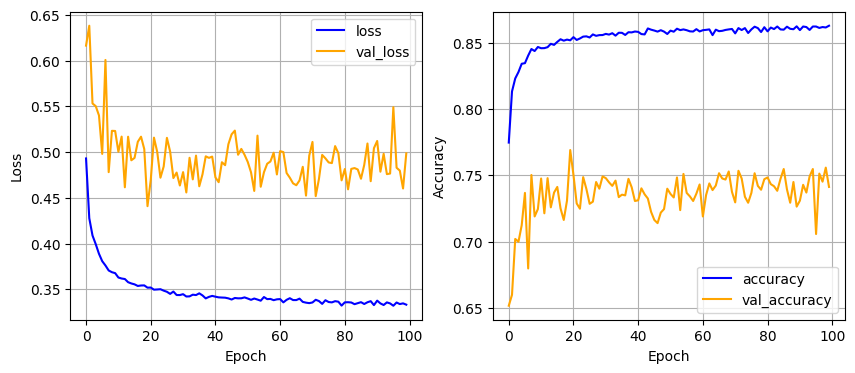

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8596 - loss: 0.3323
64 nodes, dropout 0, lr = 0.001, batch_size 32


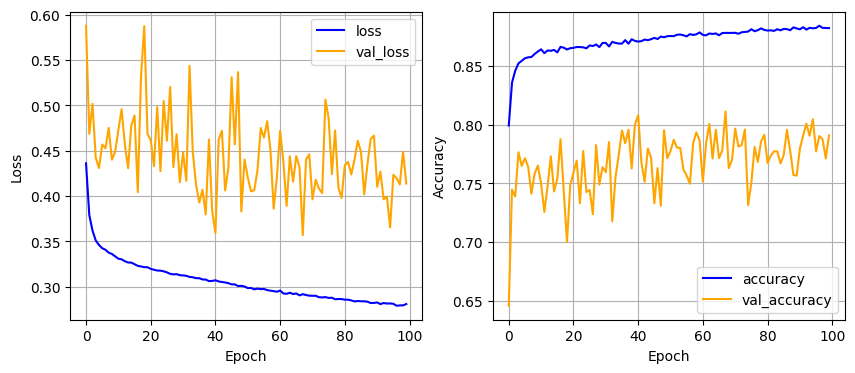

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8648 - loss: 0.3285
64 nodes, dropout 0.2, lr = 0.001, batch_size 32


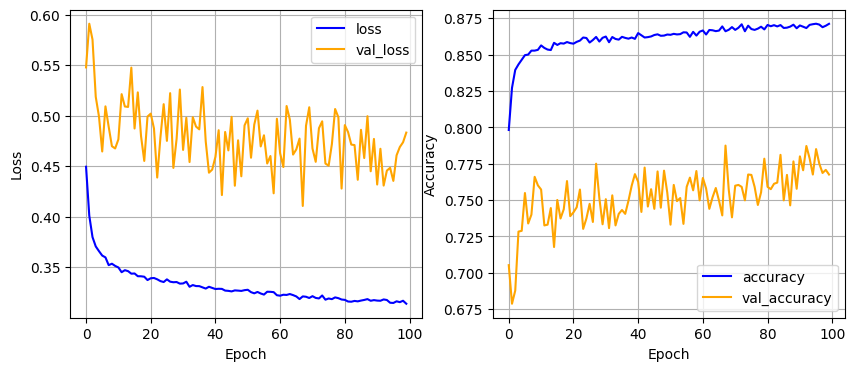

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8654 - loss: 0.3211


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64] :
  for dropout_prob in [0, 0.2] :
    print(f'{num_nodes} nodes, dropout {dropout_prob}, lr = {0.001}, batch_size {32}')
    model, history = train_model(x_train2, y_train2, num_nodes, dropout_prob, epochs, batch_size = 32, loss = 'binary_crossentropy', opt = 'adam', lr = 0.001)
    plot_history(history)
    val_loss = model.evaluate(x_valid2, y_valid2)[0]
    if val_loss < least_val_loss :
      least_val_loss = val_loss
      least_loss_model = model

In [ ]:
y_pred = least_loss_model.predict(x_test2)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
print(classification_report(y_test2, y_pred))

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.74      0.79       974
           1       0.87      0.93      0.90      1879

    accuracy                           0.86      2853
   macro avg       0.86      0.83      0.84      2853
weighted avg       0.86      0.86      0.86      2853

